<a href="https://colab.research.google.com/github/nidhi-059/Region-captioning-on-images-using-dl/blob/main/Task2_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torchmetrics
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import matplotlib as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.6/962.6 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
from torchvision import transforms
from torchvision import datasets


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
torch.manual_seed(42)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
!pip install mlxtend

In [ ]:
from mlxtend.data import loadlocal_mnist
train_x , train_y = loadlocal_mnist(images_path = '/content/train-images.idx3-ubyte',labels_path = '/content/train-labels.idx1-ubyte')
test_x , test_y = loadlocal_mnist(images_path = '/content/t10k-images.idx3-ubyte',labels_path = '/content/t10k-labels.idx1-ubyte')

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)
#coverting numpy arrays into tensors and normalizing inputs
train_x = torch.tensor(train_x, dtype = torch.float32)
train_x= train_x / 255.0
train_y = torch.tensor(train_y , dtype = torch.long)

test_x = (torch.tensor(test_x , dtype = torch.float32)) / 255.0
test_y = (torch.tensor(test_y , dtype = torch.long))

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [ ]:
# Transform: convert to tensor and normalize
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # mean and std for MNIST
])

# Download and load the training data
train_dataset = datasets.MNIST(
    root='./data',
    train=True,
    transform=transform,
    download=True
)

test_dataset = datasets.MNIST(
    root='./data',
    train=False,
    transform=transform,
    download=True
)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

100%|██████████| 9.91M/9.91M [00:00<00:00, 16.2MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 477kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.42MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.71MB/s]


In [ ]:
class CustomDataset(Dataset):
    def __init__(self, features , labels):
        self.features = features
        self.Labels = labels

    def __len__(self):
        return self.features.shape[0]

    def __getitem__(self , index):
        return self.features[index] , self.Labels[index]

In [ ]:
train_dataset = CustomDataset(train_x, train_y)
test_dataset = CustomDataset(test_x, test_y)

In [ ]:
train_Loader = DataLoader(train_dataset , batch_size = 64 , shuffle = True)
test_Loader = DataLoader(test_dataset , batch_size = 64 , shuffle = False)

In [ ]:
class model(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(num_features,256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(256,128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(128,10)
        )

    def forward(self,x):
        x = x.view(x.size(0), -1)

        return self.model(x)

In [ ]:
epochs = 30
learning_rate = 0.0029

In [ ]:
model = model(28*28)
model = model.to(device)
loss_func = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate , weight_decay = 1e-4)

In [ ]:
losses = []
accuracy = []
for epoch in range(epochs):
    running_loss = 0.0
    running_acc = 0.0
    total_samples = 0

    for batch_features, batch_labels in train_Loader:
        batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

        y_predic = model(batch_features)

        loss = loss_func(y_predic , batch_labels)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        running_loss += loss.item()

        _,predicted = torch.max(y_predic, dim=1)
        running_acc += (predicted == batch_labels).sum().item()
        total_samples += batch_labels.size(0)


    avg_loss = (running_loss)/len(train_Loader)
    avg_acc = (running_acc)/total_samples
    losses.append(avg_loss)
    accuracy.append(avg_acc)

    print(f'Epoch = {epoch + 1} , Loss = {avg_loss}')



Epoch = 1 , Loss = 0.23501116666458308
Epoch = 2 , Loss = 0.13101739704168078
Epoch = 3 , Loss = 0.11136207995421962
Epoch = 4 , Loss = 0.10428576211014123
Epoch = 5 , Loss = 0.09835550134111919
Epoch = 6 , Loss = 0.09586770079636783
Epoch = 7 , Loss = 0.09398269879796517
Epoch = 8 , Loss = 0.08915641763930651
Epoch = 9 , Loss = 0.08961045692887293
Epoch = 10 , Loss = 0.08759046513597166
Epoch = 11 , Loss = 0.08680661573315035
Epoch = 12 , Loss = 0.08851712004967661
Epoch = 13 , Loss = 0.0871929869682256
Epoch = 14 , Loss = 0.085682190722351
Epoch = 15 , Loss = 0.08520120866537126
Epoch = 16 , Loss = 0.08547135576583953
Epoch = 17 , Loss = 0.08679287998836789
Epoch = 18 , Loss = 0.08444130748335614
Epoch = 19 , Loss = 0.08442624581795034
Epoch = 20 , Loss = 0.083484647348265
Epoch = 21 , Loss = 0.08524413829617726
Epoch = 22 , Loss = 0.0847877911162942
Epoch = 23 , Loss = 0.0817490764963093
Epoch = 24 , Loss = 0.08693434028074082
Epoch = 25 , Loss = 0.08379470851562267
Epoch = 26 , Los

In [ ]:
model.eval()
total = 0
correct = 0
with torch.no_grad():
  for batch_features,batch_labels in test_Loader:
    batch_features = batch_features.to(device)  # send inputs to same device
    batch_labels = batch_labels.to(device)
    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(f"Test accuracy : {(correct/total)*100}%")


Test accuracy : 97.89%


In [ ]:
total = 0
correct = 0
with torch.no_grad():
  for batch_features,batch_labels in train_Loader:
    batch_features = batch_features.to(device)  # send inputs to same device
    batch_labels = batch_labels.to(device)
    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(f"Train accuracy : {(correct/total)*100}%")

Train accuracy : 99.05666666666667%


In [ ]:
def predict_from_dataset(index, dataset, model, class_names, device):
    """
    Predicts and displays the class of an image from a PyTorch Dataset.

    Args:
        index (int): Index of the image in the dataset
        dataset (torch.utils.data.Dataset): Dataset with __getitem__ implemented
        model (torch.nn.Module): Trained model
        class_names (list): List of class names (index -> class name)
        device (torch.device): 'cuda' or 'cpu'
    """
    model.eval()

    # Get image and label from dataset
    image_tensor, label = dataset[index]  # image_tensor: [C, H, W], label: int
    input_tensor = image_tensor.unsqueeze(0).to(device)  # add batch dimension

    # Predict
    with torch.no_grad():
        output = model(input_tensor)  # logits
        _, predicted_idx = torch.max(output, dim=1)
        predicted_class = class_names[predicted_idx.item()]
        actual_class = class_names[label if isinstance(label, int) else label.item()]

    # Undo normalization for display (assumes mean=0.5, std=0.5)
    img = image_tensor * 0.5 + 0.5  # denormalize
    img = img.permute(1, 2, 0).cpu().numpy()  # [C, H, W] → [H, W, C]

    # Display image
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class} | Actual: {actual_class}")
    plt.axis('off')
    plt.show()

    print(f"Predicted Class: {predicted_class}")
    print(f"Actual Class: {actual_class}")


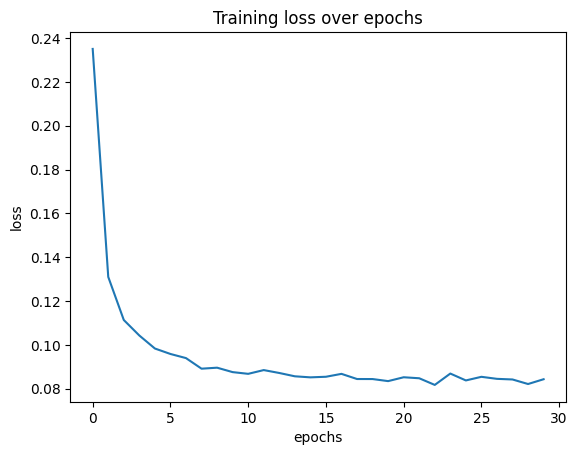

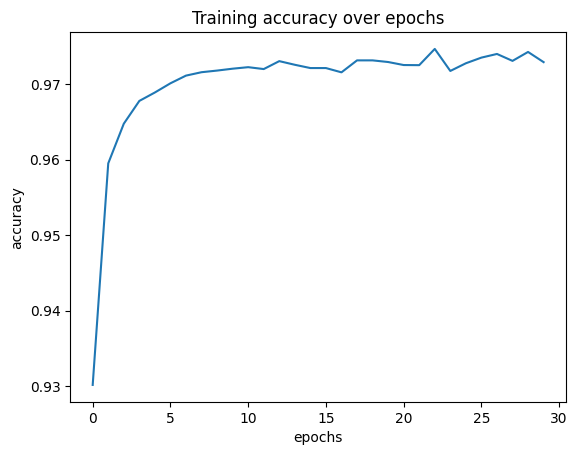

In [ ]:
plt.plot(losses)
plt.title("Training loss over epochs")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid(False)
plt.show()

plt.plot(accuracy)
plt.title("Training accuracy over epochs")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.grid(False)
plt.show()

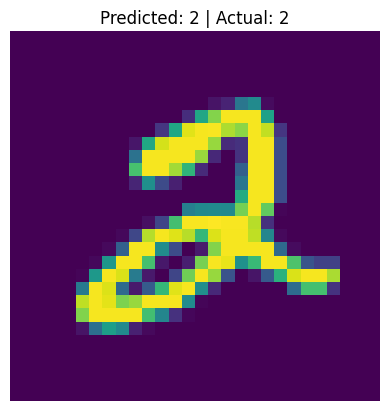

Predicted Class: 2
Actual Class: 2


In [ ]:
predict_from_dataset(
    index=5,
    dataset=train_dataset,        # or test_dataset
    model=model,
    class_names=['0', '1', '2', '3','4','5','6','7','8','9'],  # adjust to your dataset
    device=device
)

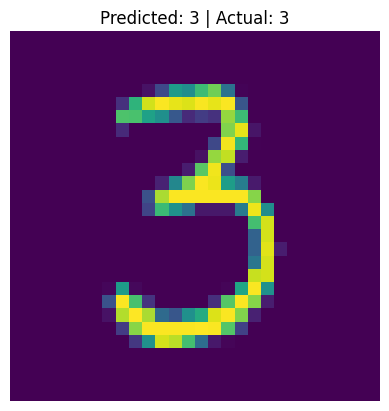

Predicted Class: 3
Actual Class: 3


In [ ]:
predict_from_dataset(
    index=50,
    dataset=train_dataset,        # or test_dataset
    model=model,
    class_names=['0', '1', '2', '3','4','5','6','7','8','9'],  # adjust to your dataset
    device=device
)

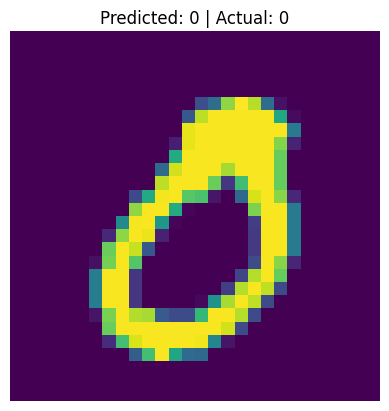

Predicted Class: 0
Actual Class: 0


In [ ]:
predict_from_dataset(
    index=75,
    dataset=train_dataset,        # or test_dataset
    model=model,
    class_names=['0', '1', '2', '3','4','5','6','7','8','9'],  # adjust to your dataset
    device=device
)

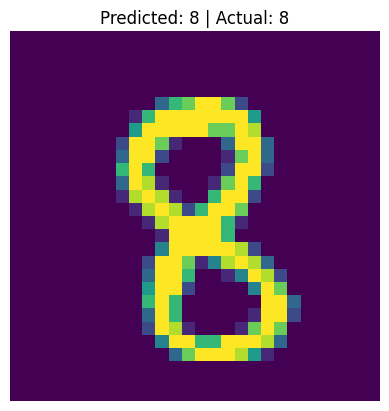

Predicted Class: 8
Actual Class: 8


In [ ]:
predict_from_dataset(
    index=2285,
    dataset=train_dataset,        # or test_dataset
    model=model,
    class_names=['0', '1', '2', '3','4','5','6','7','8','9'],  # adjust to your dataset
    device=device
)

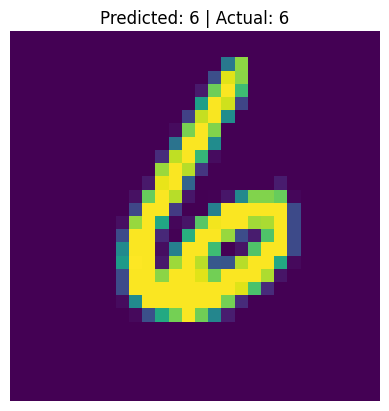

Predicted Class: 6
Actual Class: 6


In [ ]:
predict_from_dataset(
    index=22775,
    dataset=train_dataset,        # or test_dataset
    model=model,
    class_names=['0', '1', '2', '3','4','5','6','7','8','9'],  # adjust to your dataset
    device=device
)

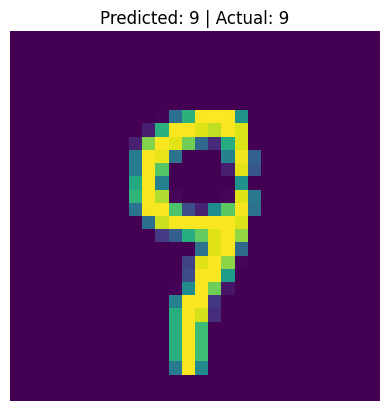

Predicted Class: 9
Actual Class: 9


In [ ]:
predict_from_dataset(
    index=285,
    dataset=train_dataset,        # or test_dataset
    model=model,
    class_names=['0', '1', '2', '3','4','5','6','7','8','9'],  # adjust to your dataset
    device=device
)

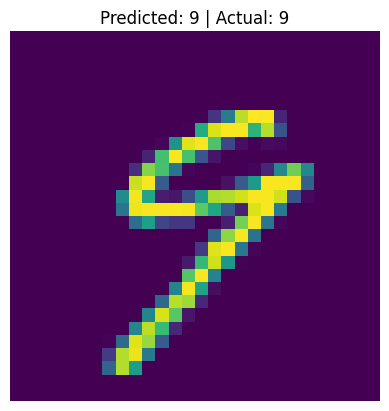

Predicted Class: 9
Actual Class: 9


In [ ]:
predict_from_dataset(
    index=59990,
    dataset=train_dataset,        # or test_dataset
    model=model,
    class_names=['0', '1', '2', '3','4','5','6','7','8','9'],  # adjust to your dataset
    device=device
)

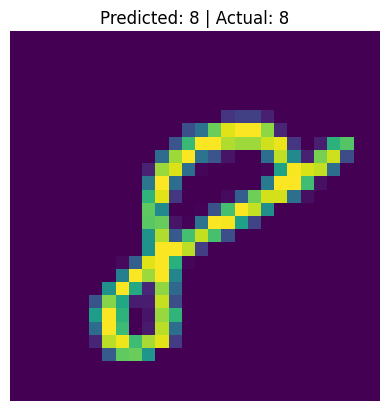

Predicted Class: 8
Actual Class: 8


In [ ]:
predict_from_dataset(
    index=59999,
    dataset=train_dataset,        # or test_dataset
    model=model,
    class_names=['0', '1', '2', '3','4','5','6','7','8','9'],  # adjust to your dataset
    device=device
)